In [1]:
library("cowplot")
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(parallel))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(stringr))

In [2]:
Y1_Res<-read.csv("/home//jupyter/BRI_Figures_Final_V2/Figure2/01_Olink_Analysis/Olink_lm_Result.csv")
Y2_Res<-read.csv("/home//jupyter/BRI_Figures_Final_V2/Extended_Figure2_1​/01_Olink/Olink_lm_Result.csv")

In [3]:
Y1_Res<-Y1_Res %>% filter(factor=='Age') %>% select(Assay,delta_changes_Age,padj)
Y2_Res<-Y2_Res %>% filter(factor=='Age')%>% select(Assay,delta_changes_Age,padj)

In [4]:
df<-left_join(Y1_Res,Y2_Res,by=c('Assay'))
colnames(df)<-c('Assay','delta_changes_Age_Y1','padj_Y1','delta_changes_Age_Y2','padj_Y2')

In [ ]:
top_genes <- data %>%


In [5]:
TOP_Proteins<-c('CXCL17','LTBP2','EDA2R','WNT9A','SCARF2',
                'GDF15','SOST','WFDC2','ACTA2','NEFL',
                'CTSV','RET','PROK1','PAEP')

Warning message in cor.test.default(df$delta_changes_Age_Y1, df$delta_changes_Age_Y2, :
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`).”


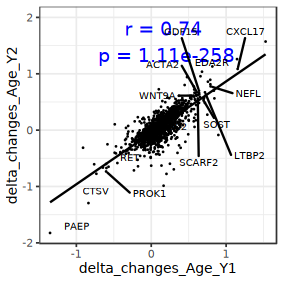

In [8]:

options(repr.plot.width = 60/25.4, repr.plot.height =60/25.4)

correlation_test <- cor.test(df$delta_changes_Age_Y1, df$delta_changes_Age_Y2,method='spearman')
correlation <- correlation_test$estimate
p_value <- correlation_test$p.value


p<-ggplot(df, aes(x=delta_changes_Age_Y1, y=delta_changes_Age_Y2)) + 
  geom_point(size=0.5,stroke=0)+
  geom_smooth(method = 'lm', color = "black", se=FALSE,linewidth = 0.5) +
  annotate("text",  
           x=0.2, 
           y=2,
           label = paste("r =", round(correlation, 2), 
                         "\np =",signif(p_value,3)), 
           vjust = 1.1,
           color = "blue") +
theme_bw(base_size=8)+
  geom_text_repel(
    data = df %>% filter(Assay%in% TOP_Proteins),
    box.padding = 0.5,
    force = 0.5,
    max.overlaps = 50,
    nudge_x = 0.15,
    hjust = 0.1,
    segment.size = 0.1,
    mapping = aes(label = Assay),
    size = 2
  )
p
ggsave('FigureC.pdf',p,width = 45/25.4,height = 45/25.4)